In [1]:
import pandas as pd
from scipy.io import arff


In [2]:
new = pd.read_csv("bank-marketing1.csv")

In [3]:
new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,b'technician',b'married',b'tertiary',b'no',825.0,b'no',b'no',b'cellular',17.0,b'nov',977.0,3.0,-1.0,0.0,b'unknown',b'2'
45207,71.0,b'retired',b'divorced',b'primary',b'no',1729.0,b'no',b'no',b'cellular',17.0,b'nov',456.0,2.0,-1.0,0.0,b'unknown',b'2'
45208,72.0,b'retired',b'married',b'secondary',b'no',5715.0,b'no',b'no',b'cellular',17.0,b'nov',1127.0,5.0,184.0,3.0,b'success',b'2'
45209,57.0,b'blue-collar',b'married',b'secondary',b'no',668.0,b'no',b'no',b'telephone',17.0,b'nov',508.0,4.0,-1.0,0.0,b'unknown',b'1'


In [4]:
new.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
Class    0
dtype: int64

In [5]:
new['Class'].value_counts()

b'1'    39922
b'2'     5289
Name: Class, dtype: int64

In [4]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
Note: you may need to restart the kernel to use updated packages.


In [5]:
import h2o
from h2o.automl import H2OAutoML

In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 days 3 hours 7 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,"28 days, 5 hours and 51 minutes"
H2O_cluster_name:,H2O_from_python_lakshmiph_d0splj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.183 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [7]:

# convert pandas DataFrame into H2O Frame
new_df = h2o.H2OFrame(new)
# Describe  the train h20Frame
new_df.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:45211
Cols:17

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432836,,,,,1362.2720576850777,,,,15.806418791886928,,258.1630797814687,2.7638406582468966,40.19782796222148,0.5803233726305538,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.61876204097542,,,,,3044.765829168518,,,,8.322476153044592,,257.52781226517175,3.0980208832791676,100.12874599059843,2.303441044931217,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'


In [8]:
x = new_df.columns
y = 'Class'
# remove label classvariable from feature variable
x.remove(y)

In [9]:
train, test = new_df.split_frame(ratios = [.8], seed = 1234)

In [10]:
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [11]:
# import autoML from H2O
from h2o.automl import H2OAutoML
# callh20automl  function
aml = H2OAutoML(max_runtime_secs=350,
                exclude_algos =['DeepLearning'],
                seed = 1,
                # stopping_metric ='logloss',
                # sort_metric ='logloss',
                balance_classes = False,
)
# train model and record time % time
aml.train(x = x, y = y, training_frame = train, validation_frame=test)

AutoML progress: |
23:39:26.342: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
23:39:26.345: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),18/67
# GBM base models (used / total),16/64
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [12]:
lb = aml.leaderboard

In [13]:
lb.head(rows = lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_4_20230718_231756,0.936544,0.19421,0.630201,0.167061,0.247264,0.0611397
StackedEnsemble_BestOfFamily_1_AutoML_4_20230718_231756,0.935359,0.194947,0.626193,0.16752,0.247983,0.0614957
GBM_1_AutoML_4_20230718_231756,0.934922,0.196823,0.621753,0.169701,0.248976,0.0619889
GBM_2_AutoML_4_20230718_231756,0.934435,0.199756,0.620642,0.159059,0.250074,0.0625369
GBM_3_AutoML_4_20230718_231756,0.934236,0.20043,0.613329,0.16606,0.250701,0.0628509
GBM_5_AutoML_4_20230718_231756,0.934052,0.200026,0.617917,0.166725,0.250128,0.0625638
GBM_4_AutoML_4_20230718_231756,0.933563,0.202382,0.610505,0.15541,0.251998,0.063503
GBM_grid_1_AutoML_4_20230718_231756_model_2,0.932713,0.20114,0.618668,0.179823,0.250146,0.0625729
GBM_grid_1_AutoML_4_20230718_231756_model_1,0.928383,0.209642,0.607984,0.173365,0.255746,0.0654058
DRF_1_AutoML_4_20230718_231756,0.928283,0.209875,0.605308,0.17321,0.251868,0.0634377


In [16]:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [13]:
best_model = aml.get_best_model(criterion='auc')
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_5_AutoML_3_20230718_224041


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  27/140
# GBM base models (used / total)      25/137
# DRF base models (used / total)      2/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03304800191803464
RMSE: 0.18179109416589867
LogLoss: 0.11790107133458119
AUC: 0.9857445237997138
AUCPR: 0.918761812484312
Gini: 0.9714890475994276
Null degrees of freedom: 10057
Residual degrees of freedom: 10030
Null deviance: 7175.7

In [23]:
model_path = h2o.save_model(model=best_model,path='h20bankmarketing', force=True)

In [24]:
loaded_model = h2o.load_model(path='h20bankmarketing/StackedEnsemble_AllModels_2_AutoML_1_20230713_203633')
loaded_model.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,b'1',b'2'
b'1',0.998269,0.00173121
b'1',0.999532,0.00046796
b'1',0.999254,0.000745828
b'1',0.99837,0.00163001
b'1',0.993242,0.00675763
b'1',0.999106,0.000894227
b'1',0.998443,0.00155662
b'1',0.983069,0.0169312
b'1',0.999473,0.000527094
b'1',0.998769,0.00123144


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20230713_203633_model_41,1,0.0384451,0.999997,0.000308656,0.0698283,0.004876,1317,0.00919,GBM
GBM_grid_1_AutoML_1_20230713_203633_model_13,0.999904,0.0456435,0.999398,0.00692375,0.0893843,0.00798955,1195,0.006184,GBM
GBM_grid_1_AutoML_1_20230713_203633_model_8,0.99989,0.0364069,0.999351,0.00505363,0.073298,0.0053726,1034,0.006057,GBM
DRF_1_AutoML_1_20230713_203633,0.99936,0.0679272,0.996431,0.0165402,0.119367,0.0142486,1216,0.007992,DRF
GBM_grid_1_AutoML_1_20230713_203633_model_15,0.99909,0.0743958,0.994892,0.0231985,0.12378,0.0153215,1043,0.007615,GBM
GBM_grid_1_AutoML_1_20230713_203633_model_1,0.997579,0.0858857,0.984545,0.0355929,0.142622,0.020341,1048,0.009629,GBM
GBM_grid_1_AutoML_1_20230713_203633_model_45,0.997234,0.073785,0.98615,0.0392567,0.12902,0.0166462,1067,0.00979,GBM
GBM_grid_1_AutoML_1_20230713_203633_model_5,0.997061,0.0798145,0.984376,0.0368097,0.136914,0.0187454,970,0.005611,GBM
GBM_grid_1_AutoML_1_20230713_203633_model_33,0.995536,0.0872556,0.97876,0.0461094,0.142438,0.0202885,923,0.008915,GBM
GBM_grid_1_AutoML_1_20230713_203633_model_49,0.995485,0.0971092,0.970531,0.0529173,0.156506,0.0244941,1123,0.011529,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_2_AutoML_1_20230713_203633

,b'1',b'2',Error,Rate
b'1',39201.0,721.0,0.0181,(721.0/39922.0)
b'2',1036.0,4253.0,0.1959,(1036.0/5289.0)
Total,40237.0,4974.0,0.0389,(1757.0/45211.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

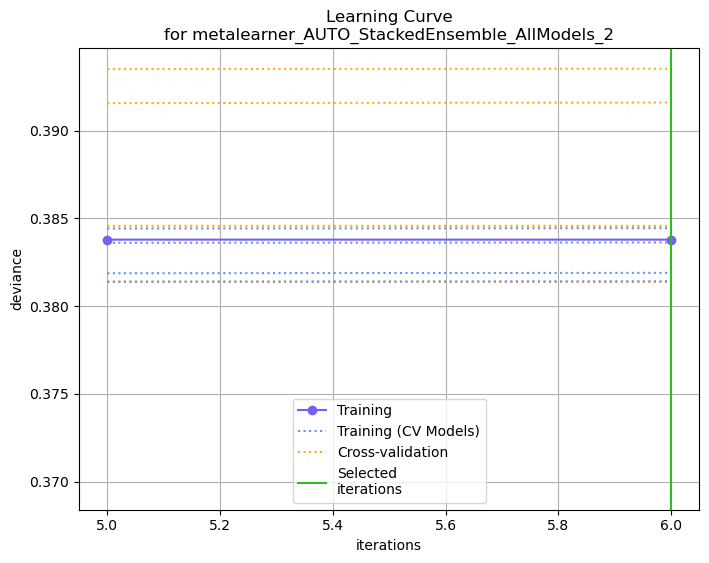

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

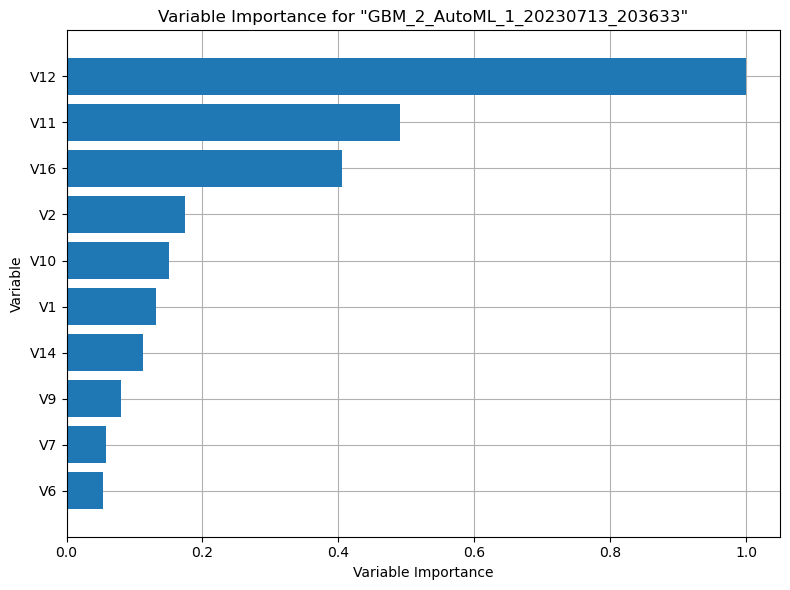

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

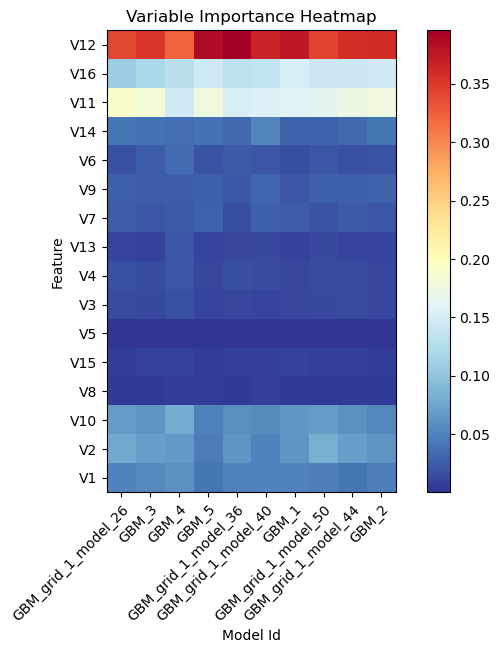

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

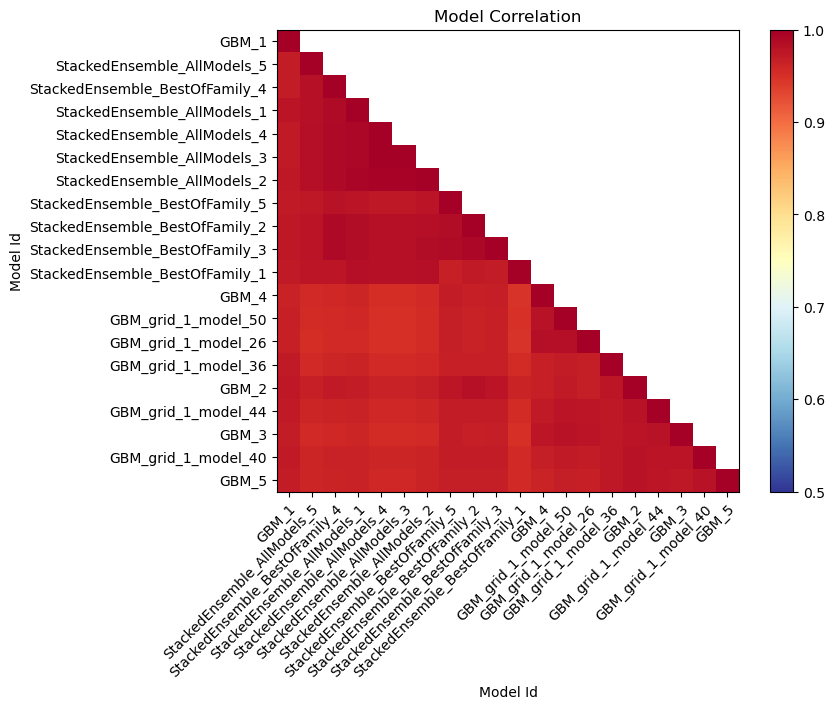

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

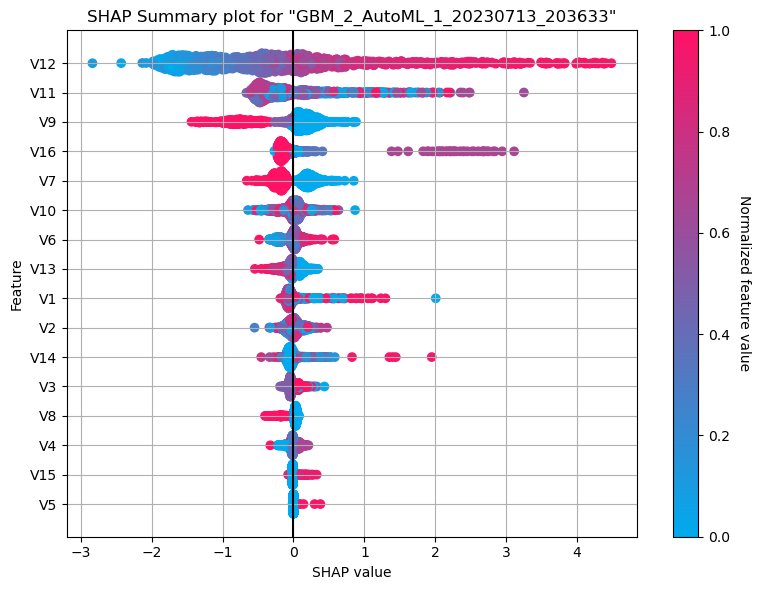

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

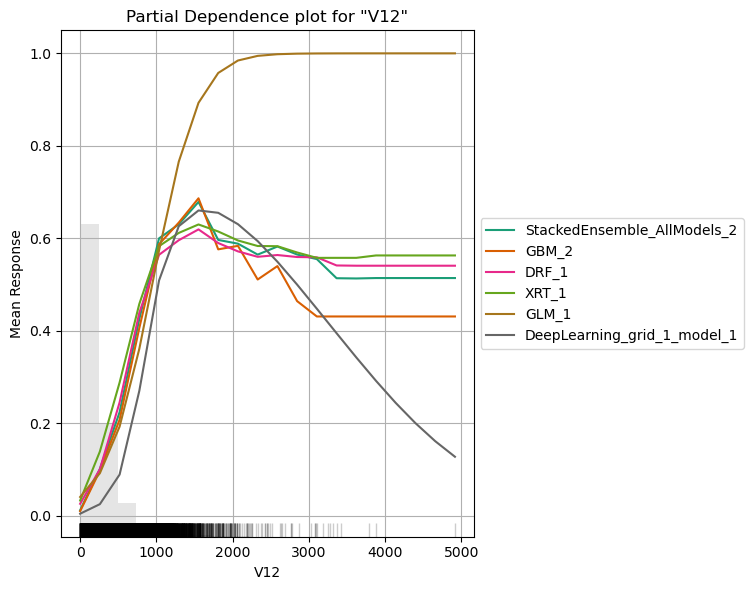

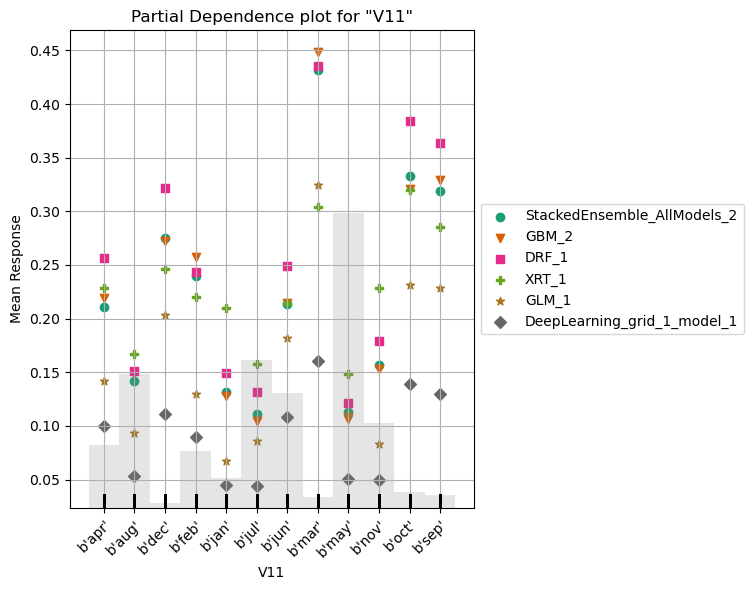

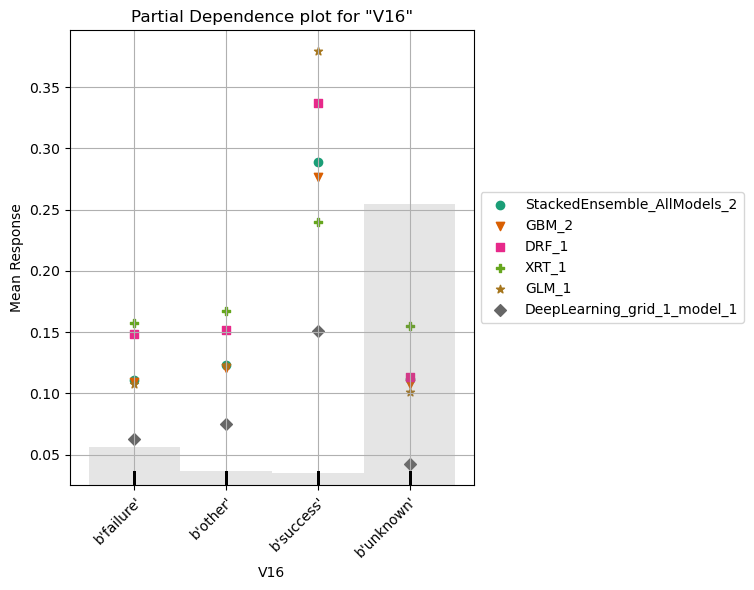

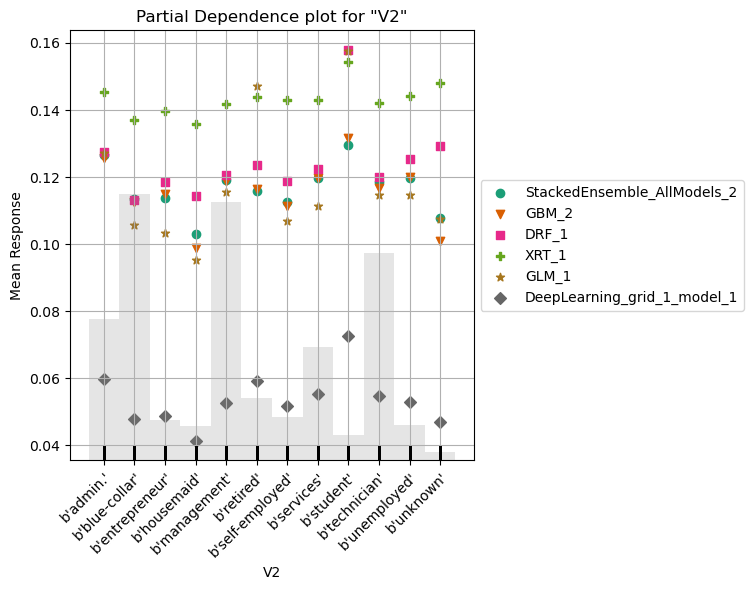

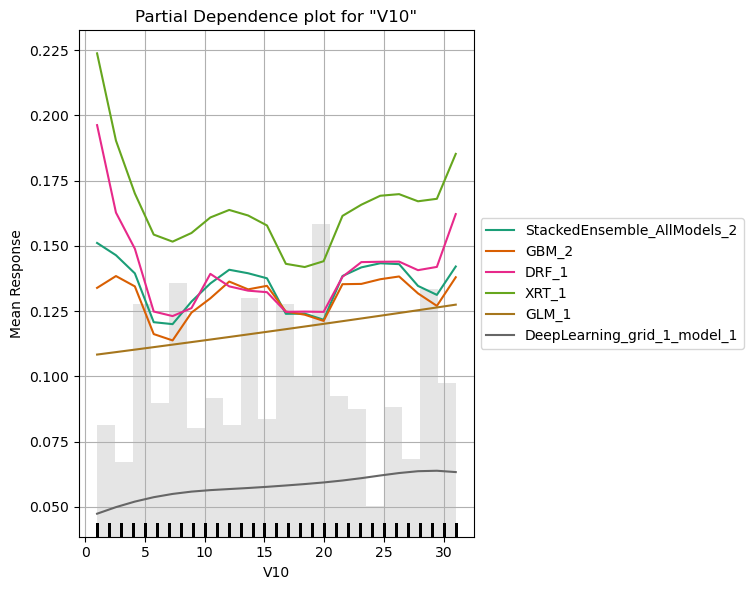

In [25]:
explain_model = aml.explain(frame = test, figsize = (8,6))
